## Contexto Geral

Uma instituição financeira precisa reconstruir **3 (três)** de seus principais **sistemas preditivos** que envolvem produtos de **cartão de crédito** e, pra isso, convocou você como parte do time de IA e Ciência de Dados para atuar nesta reformulação.

## 📚 Dicionário das Bases – Base de Clientes

| Variável                     | Descrição                                                                 |
|-----------------------------|---------------------------------------------------------------------------|
| **ID_Cliente**              | Identificador único para cada cliente.                                   |
| **Nome**                    | Nome completo do cliente.                                                |
| **Idade**                   | Idade do cliente em anos.                                                |
| **Viagens**                 | Frequência ou preferência de viagens.                                    |
| **Restaurantes**            | Frequência ou preferência de idas a restaurantes.                        |
| **Entretenimento**         | Frequência ou preferência de atividades de entretenimento.               |
| **Cashback**                | Preferência ou uso de programas de cashback.                             |
| **Compras online**          | Frequência ou preferência de compras online.                             |
| **Farmácias**               | Frequência ou preferência de compras em farmácias.                       |
| **Programas de Milhagem**   | Uso ou interesse em programas de milhagem.                               |
| **Postos de Combustível**   | Frequência ou preferência de abastecimento em postos de combustível.     |
| **Mercados**                | Frequência ou preferência de compras em mercados.                        |
| **Cidade**                  | Cidade onde o cliente reside.                                            |
| **Cargo**                   | Profissão ou ocupação do cliente.                                        |
| **Estado Civil**            | Estado civil do cliente (ex.: Solteiro, Casado, Divorciado, Viúvo).      |
| **Tempo na Empresa**        | Tempo de serviço ou experiência no cargo atual (em anos).                |
| **Pessoas em Casa**         | Número de pessoas que residem na casa do cliente.                        |
| **Moradia**                 | Tipo de moradia (Próprio ou Alugado).                                    |
| **Possui Carro**            | Indica se o cliente possui carro (True/False).                           |
| **Renda**                   | Renda mensal do cliente (em unidades monetárias).                        |
| **Investimentos**           | Valor total investido pelo cliente (em unidades monetárias).             |
| **Ativos**                  | Valor total dos ativos do cliente (em unidades monetárias).              |
| **Dívidas**                 | Valor total das dívidas do cliente (em unidades monetárias).             |
| **Probabilidade Inadimplencia** | Probabilidade percentual do cliente se tornar inadimplente.         |
| **Score**                   | Pontuação de crédito ou perfil financeiro do cliente.                    |
| **Principal Cartão**        | Tipo de cartão principal utilizado pelo cliente.                         |

## 📚 Dicionário das Bases – Base de Prospects

| Variável                     | Descrição                                                                 |
|-----------------------------|---------------------------------------------------------------------------|
| **ID_Cliente**              | Identificador único para cada cliente.                                   |
| **Nome**                    | Nome completo do cliente.                                                |
| **Idade**                   | Idade do cliente em anos.                                                |
| **Viagens**                 | Frequência ou preferência de viagens.                                    |
| **Restaurantes**            | Frequência ou preferência de idas a restaurantes.                        |
| **Entretenimento**         | Frequência ou preferência de atividades de entretenimento.               |
| **Cashback**                | Preferência ou uso de programas de cashback (escala numérica).           |
| **Compras online**          | Frequência ou preferência de compras online.                             |
| **Farmácias**               | Frequência ou preferência de compras em farmácias.                       |
| **Programas de Milhagem**   | Uso ou interesse em programas de milhagem.                               |
| **Postos de Combustível**   | Frequência ou preferência de abastecimento em postos de combustível.     |
| **Mercados**                | Frequência ou preferência de compras em mercados.                        |
| **Cidade**                  | Cidade onde o cliente reside.                                            |
| **Cargo**                   | Profissão ou ocupação do cliente.                                        |
| **Estado Civil**            | Estado civil do cliente (ex.: Solteiro, Casado, Divorciado, Viúvo).      |
| **Tempo na Empresa**        | Tempo de serviço ou experiência no cargo atual (em anos).                |
| **Pessoas em Casa**         | Número de pessoas que residem na casa do cliente.                        |
| **Moradia**                 | Tipo de moradia (Próprio ou Alugado).                                    |
| **Possui Carro**            | Indica se o cliente possui carro (True/False).                           |
| **Renda**                   | Renda mensal do cliente (em unidades monetárias).                        |
| **Investimentos**           | Valor total investido pelo cliente (em unidades monetárias).             |
| **Ativos**                  | Valor total dos ativos do cliente (em unidades monetárias).              |
| **Dívidas**                 | Valor total das dívidas do cliente (em unidades monetárias).             |

## 📚 Dicionário das Bases – Base de Transações

| Variável         | Descrição                                                                 |
|------------------|---------------------------------------------------------------------------|
| **ID_Transacao** | Identificador único para cada transação realizada.                        |
| **ID_Cliente**   | Identificador único do cliente que realizou a transação.                  |
| **Estabelecimento** | Nome do estabelecimento onde a transação ocorreu.                     |
| **Segmento**     | Setor ou tipo de negócio do estabelecimento (ex.: Supermercado, Farmácia).|
| **DataHora**     | Data e hora em que a transação foi realizada.                             |
| **Valor**        | Valor monetário da transação.                                             |
| **Fraude**       | Indica se a transação foi classificada como fraudulenta ("Sim" ou "Não"). |

## Desafio 1 – Cálculo de Score

Para administrar produtos de cartão de crédito para clientes, bem como oferta de cartão para prospects (possíveis clientes), calcular o **Score de Crédito** é crucial para entender o perfil do cliente e poder ajustar limites, conceder vantagens e recomendar novos produtos.

Desta forma, seu primeiro desafio será **calcular o Score de Crédito para a base de Prospects**, com base em um modelo que será treinado na **base de Clientes atuais da instituição**.

Mas calma, o Score é o objetivo final, mas pra atingir ele é necessário construir um **modelo preditivo para inadimplência**.

> **Este é o REAL DESAFIO.**

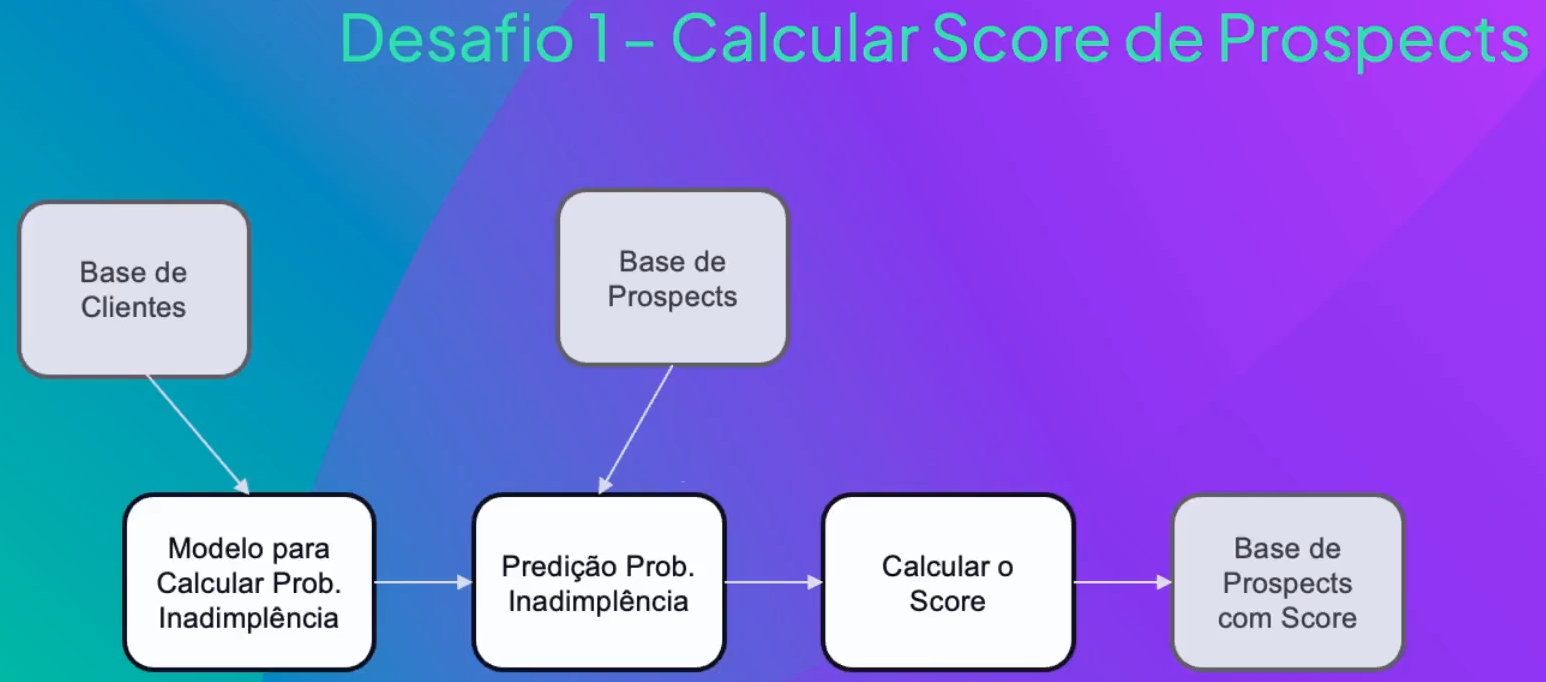

In [3]:
def calcular_score(row):
    renda_norm = min(row['Renda'] / 50000, 1)
    invest_norm = min(row['Investimentos'] / 1e6, 1)
    ativos_norm = min(row['Ativos'] / 2e6, 1)
    dividas_norm = min(row['Dívidas'] / 5e5, 1)

    score_base = (
        renda_norm * 0.4 +
        invest_norm * 0.3 +
        ativos_norm * 0.2 -
        dividas_norm * 0.4
    ) * 1000

    score_ajustado = score_base * (1 - (row['Probabilidade Inadimplencia'] / 100))

    return int(round(max(0, min(1000, score_ajustado))))

## Desafio 2 – Recomendação de Cartão

Agora que os *prospects* (possíveis clientes) já possuem um **Score** calculado, o time de vendas já pode ofertar o produto de cartão de crédito ideal para que este *prospect* vire cliente.

Desta forma, seu segundo desafio será:

**Recomendar um produto de cartão para a base de Prospects**, com base em um modelo que será treinado na **base de Clientes atuais da instituição**.

## Estrutura de Produtos de Cartão

1. **Rocketseat**
2. **Bandeira**: Mastercard, Visa
3. **Utilidade**: Travel, Life, Shopping
4. **Categoria**: Basic, Select, Elite, Platinum

**Exemplo**: *Rocketseat Visa Travel Platinum*

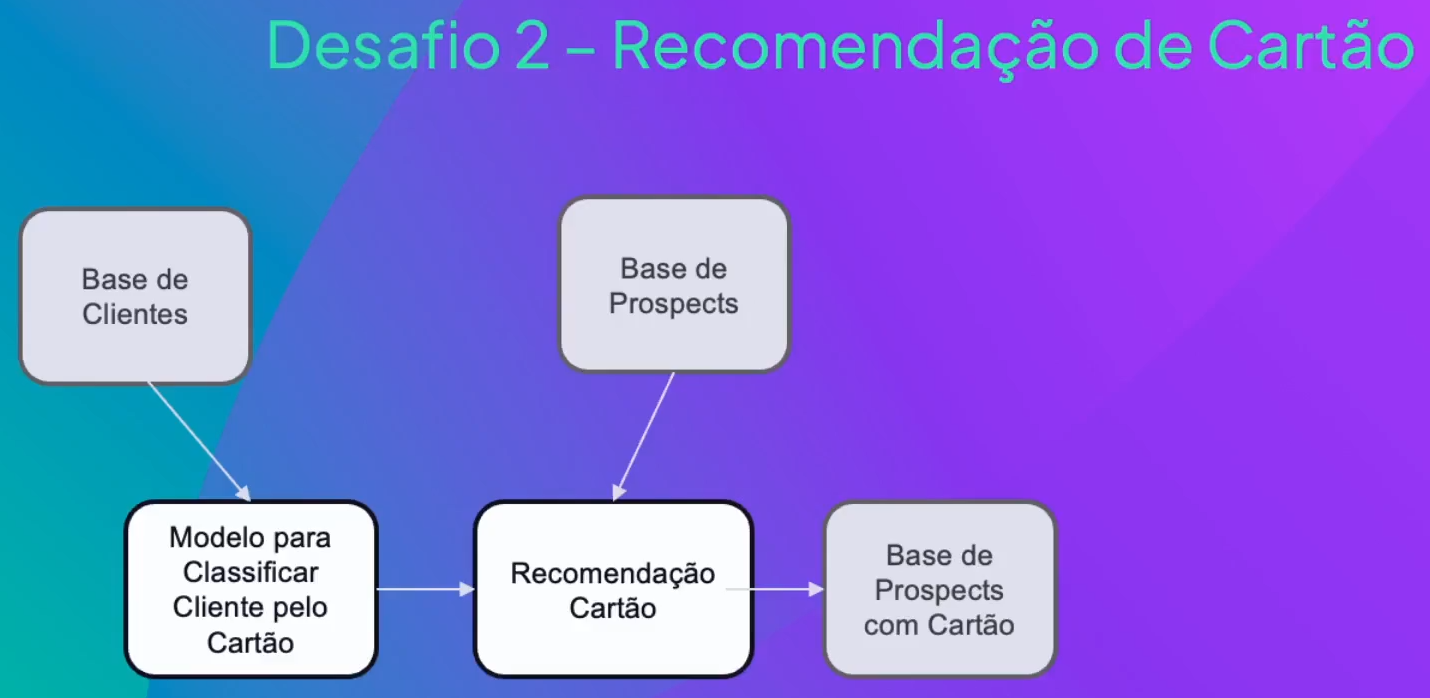

## Desafio 3 – Antifraude de Cartão

A fraude de cartão é um dos problemas mais frequentes em instituições financeiras no mundo todo e equipes de cibersegurança trabalham lado a lado com times de Analytics e IA para prevenir este tipo de ameaça, que prejudica clientes, estabelecimentos e instituições financeiras.

E como esta instituição financeira está com um volume alto de fraude (aprox. 10%), acima do padrão de mercado, seu terceiro desafio será **identificar se uma transação de cartão de crédito é fraude**, analisando histórico de transações de clientes. Pra isso, você deverá construir um modelo que tenha uma boa performance nesta detecção.

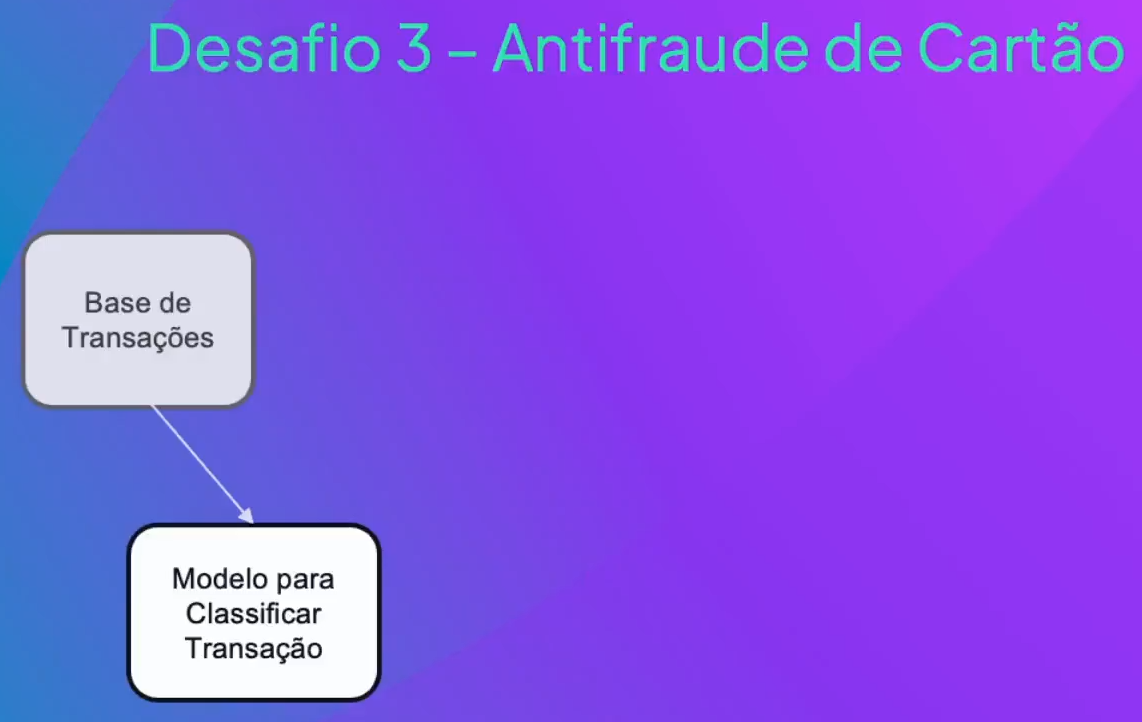